In [76]:
import pandas as pd
import numpy as np
import missingno as msno
import spacy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob
import re
import preprocessor as p
from wordcloud import WordCloud

In [159]:
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_excel("data.xlsx")

In [4]:
df

,UniversalMessageId,SocialNetwork,SenderUserId,SenderScreenName,SenderListedName,SenderProfileImgUrl,SenderProfileLink,Sender Followers Count,SenderInfluencerScore,SenderAge,...,Retweets,Tweet Generator,Location,Country,State,City,Latitude,Longitude,Sender Email,Message Type
0,TWITTER_8_1271507282027614208,TWITTER,76649744,abagdadi,anwer bagdadi,https://pbs.twimg.com/profile_images/773954554...,NaN,2646.0,NaN,NaN,...,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,TWITTER_8_1271506336262623234,TWITTER,108473360,techvignesh,Vignesh Varadharajan,https://pbs.twimg.com/profile_images/126785507...,NaN,507.0,NaN,NaN,...,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",South Africa,Gauteng,Johannesburg,-26.20227,28.04363,NaN,Twitter Retweet
2,TWITTER_4_1271505174297796609,TWITTER,2817687492,ReworkAmerica,Rework America,https://pbs.twimg.com/profile_images/913020134...,NaN,1718.0,NaN,NaN,...,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,WEB_98_7489736133816419a2fbec1a9e2ada24,WEB,449D069DD1505A8F8256A8734600D562,Tait Lawton,Tait Lawton,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,Canada,NaN,NaN,0.00000,0.00000,NaN,Blog Post
4,TWITTER_8_1271502174699339777,TWITTER,30482756,Milanowekpet,Peter Schellinck,https://pbs.twimg.com/profile_images/231007149...,NaN,2218.0,NaN,NaN,...,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,TWITTER_8_1269699240651087872,TWITTER,19284888,Nicochan33,Nicolas Babin,https://pbs.twimg.com/profile_images/773909130...,NaN,78387.0,NaN,NaN,...,NaN,Twitter for Android,France,France,NaN,NaN,46.00000,2.00000,NaN,Twitter Retweet
3949,TWITTER_2_1269699202365435905,TWITTER,220089132,mserracanta,Miquel Serracanta🎗,https://pbs.twimg.com/profile_images/124908614...,NaN,1301.0,NaN,NaN,...,1.0,Twitter for iPhone,"Catalonia, Spain",Spain,Catalonia,NaN,41.82046,1.86768,NaN,Twitter Update
3950,TWITTER_8_1269698792091275265,TWITTER,1139524920,IEAKwame,Kwame Owino,https://pbs.twimg.com/profile_images/327166249...,NaN,40302.0,NaN,NaN,...,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,TWITTER_8_1269698611929124866,TWITTER,84274680,OmerAtakoglu,Ömer Atakoğlu,https://pbs.twimg.com/profile_images/752486315...,NaN,1346.0,NaN,NaN,...,NaN,Twitter for iPhone,"Istanbul, Turkey",Turkey,Istanbul,NaN,41.03508,28.98331,NaN,Twitter Retweet


<AxesSubplot:>

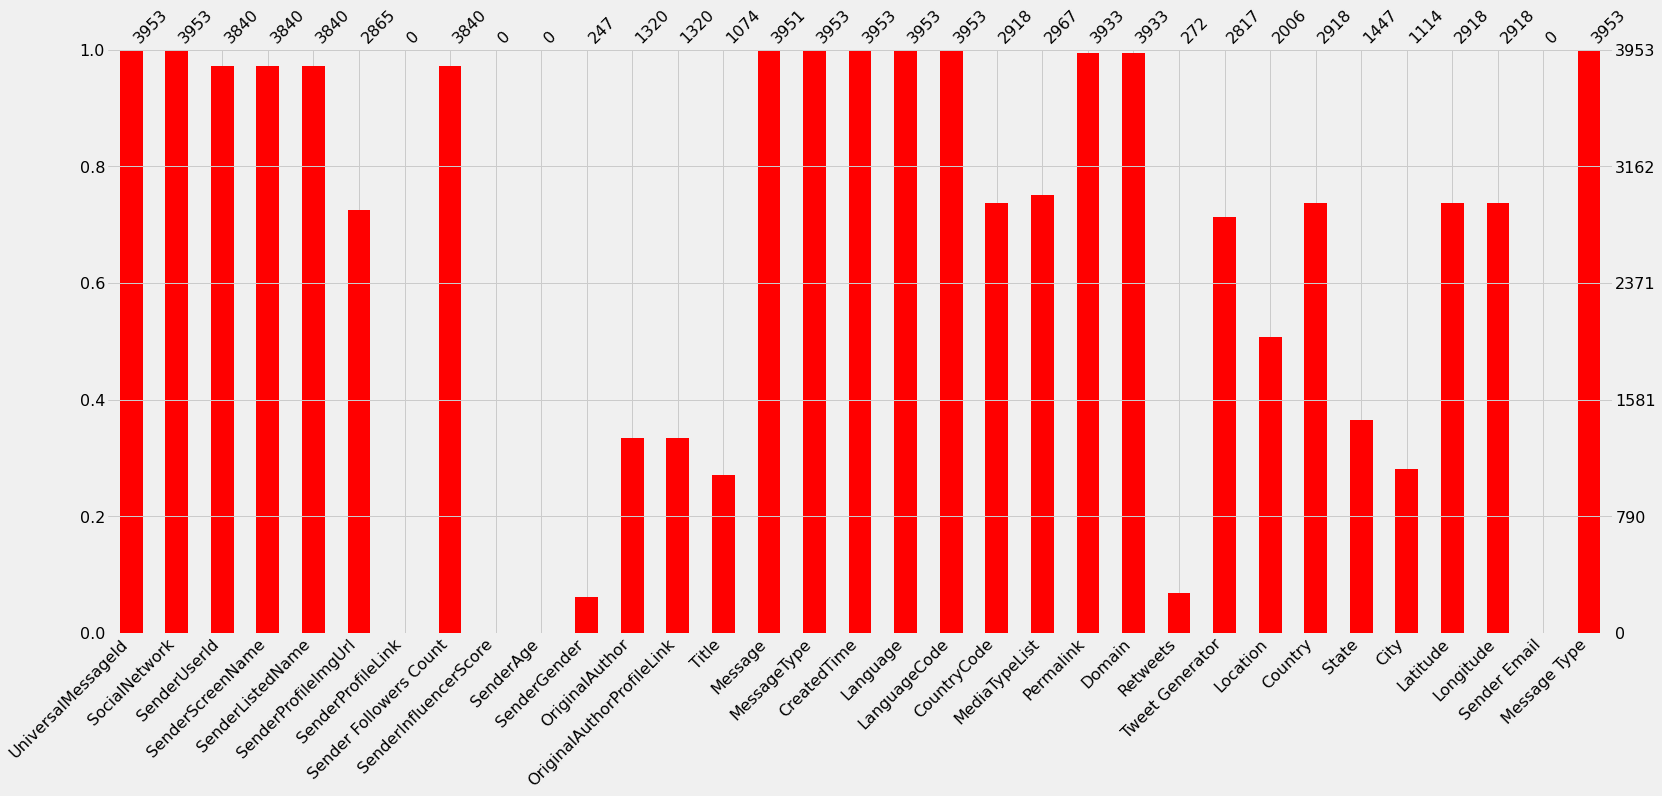

In [5]:
msno.bar(df,color='red')

In [6]:
df.columns

Index(['UniversalMessageId', 'SocialNetwork', 'SenderUserId',
       'SenderScreenName', 'SenderListedName', 'SenderProfileImgUrl',
       'SenderProfileLink', 'Sender Followers Count', 'SenderInfluencerScore',
       'SenderAge', 'SenderGender', 'OriginalAuthor',
       'OriginalAuthorProfileLink', 'Title', 'Message', 'MessageType',
       'CreatedTime', 'Language', 'LanguageCode', 'CountryCode',
       'MediaTypeList', 'Permalink', 'Domain', 'Retweets', 'Tweet Generator',
       'Location', 'Country', 'State', 'City', 'Latitude', 'Longitude',
       'Sender Email', 'Message Type'],
      dtype='object')

In [7]:
df.isna().sum()*100/len(df)

UniversalMessageId             0.000000
SocialNetwork                  0.000000
SenderUserId                   2.858588
SenderScreenName               2.858588
SenderListedName               2.858588
SenderProfileImgUrl           27.523400
SenderProfileLink            100.000000
Sender Followers Count         2.858588
SenderInfluencerScore        100.000000
SenderAge                    100.000000
SenderGender                  93.751581
OriginalAuthor                66.607640
OriginalAuthorProfileLink     66.607640
Title                         72.830761
Message                        0.050594
MessageType                    0.000000
CreatedTime                    0.000000
Language                       0.000000
LanguageCode                   0.000000
CountryCode                   26.182646
MediaTypeList                 24.943081
Permalink                      0.505945
Domain                         0.505945
Retweets                      93.119150
Tweet Generator               28.737668


### Dropping all the columns having first of all 100 percent 

In [8]:
df.drop(['SenderProfileLink','SenderInfluencerScore','SenderAge','Sender Email'],axis=1,inplace=True)

In [9]:
df

,UniversalMessageId,SocialNetwork,SenderUserId,SenderScreenName,SenderListedName,SenderProfileImgUrl,Sender Followers Count,SenderGender,OriginalAuthor,OriginalAuthorProfileLink,...,Domain,Retweets,Tweet Generator,Location,Country,State,City,Latitude,Longitude,Message Type
0,TWITTER_8_1271507282027614208,TWITTER,76649744,abagdadi,anwer bagdadi,https://pbs.twimg.com/profile_images/773954554...,2646.0,NaN,McKinsey,https://twitter.com/McKinsey,...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,TWITTER_8_1271506336262623234,TWITTER,108473360,techvignesh,Vignesh Varadharajan,https://pbs.twimg.com/profile_images/126785507...,507.0,NaN,McKinsey,https://twitter.com/McKinsey,...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",South Africa,Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,TWITTER_4_1271505174297796609,TWITTER,2817687492,ReworkAmerica,Rework America,https://pbs.twimg.com/profile_images/913020134...,1718.0,NaN,NaN,NaN,...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,WEB_98_7489736133816419a2fbec1a9e2ada24,WEB,449D069DD1505A8F8256A8734600D562,Tait Lawton,Tait Lawton,NaN,0.0,NaN,NaN,NaN,...,nanjingmarketinggroup.com,NaN,NaN,NaN,Canada,NaN,NaN,0.00000,0.00000,Blog Post
4,TWITTER_8_1271502174699339777,TWITTER,30482756,Milanowekpet,Peter Schellinck,https://pbs.twimg.com/profile_images/231007149...,2218.0,M,McKonGov,https://twitter.com/McKonGov,...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,TWITTER_8_1269699240651087872,TWITTER,19284888,Nicochan33,Nicolas Babin,https://pbs.twimg.com/profile_images/773909130...,78387.0,M,McKinsey,https://twitter.com/McKinsey,...,twitter.com,NaN,Twitter for Android,France,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,TWITTER_2_1269699202365435905,TWITTER,220089132,mserracanta,Miquel Serracanta🎗,https://pbs.twimg.com/profile_images/124908614...,1301.0,NaN,NaN,NaN,...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Spain,Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,TWITTER_8_1269698792091275265,TWITTER,1139524920,IEAKwame,Kwame Owino,https://pbs.twimg.com/profile_images/327166249...,40302.0,NaN,McKinsey,https://twitter.com/McKinsey,...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,TWITTER_8_1269698611929124866,TWITTER,84274680,OmerAtakoglu,Ömer Atakoğlu,https://pbs.twimg.com/profile_images/752486315...,1346.0,NaN,retailgeek,https://twitter.com/retailgeek,...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Turkey,Istanbul,NaN,41.03508,28.98331,Twitter Retweet


In [10]:
df.drop("UniversalMessageId",axis=1,inplace=True)

In [11]:
df

,SocialNetwork,SenderUserId,SenderScreenName,SenderListedName,SenderProfileImgUrl,Sender Followers Count,SenderGender,OriginalAuthor,OriginalAuthorProfileLink,Title,...,Domain,Retweets,Tweet Generator,Location,Country,State,City,Latitude,Longitude,Message Type
0,TWITTER,76649744,abagdadi,anwer bagdadi,https://pbs.twimg.com/profile_images/773954554...,2646.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,TWITTER,108473360,techvignesh,Vignesh Varadharajan,https://pbs.twimg.com/profile_images/126785507...,507.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",South Africa,Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,TWITTER,2817687492,ReworkAmerica,Rework America,https://pbs.twimg.com/profile_images/913020134...,1718.0,NaN,NaN,NaN,NaN,...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,WEB,449D069DD1505A8F8256A8734600D562,Tait Lawton,Tait Lawton,NaN,0.0,NaN,NaN,NaN,10 Chinese Market Trends Since COVID-19,...,nanjingmarketinggroup.com,NaN,NaN,NaN,Canada,NaN,NaN,0.00000,0.00000,Blog Post
4,TWITTER,30482756,Milanowekpet,Peter Schellinck,https://pbs.twimg.com/profile_images/231007149...,2218.0,M,McKonGov,https://twitter.com/McKonGov,NaN,...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,TWITTER,19284888,Nicochan33,Nicolas Babin,https://pbs.twimg.com/profile_images/773909130...,78387.0,M,McKinsey,https://twitter.com/McKinsey,NaN,...,twitter.com,NaN,Twitter for Android,France,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,TWITTER,220089132,mserracanta,Miquel Serracanta🎗,https://pbs.twimg.com/profile_images/124908614...,1301.0,NaN,NaN,NaN,NaN,...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Spain,Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,TWITTER,1139524920,IEAKwame,Kwame Owino,https://pbs.twimg.com/profile_images/327166249...,40302.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,TWITTER,84274680,OmerAtakoglu,Ömer Atakoğlu,https://pbs.twimg.com/profile_images/752486315...,1346.0,NaN,retailgeek,https://twitter.com/retailgeek,NaN,...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Turkey,Istanbul,NaN,41.03508,28.98331,Twitter Retweet


In [12]:
df.drop(["SenderUserId","SenderScreenName","SenderListedName"],axis=1,inplace=True)

In [13]:
df

,SocialNetwork,SenderProfileImgUrl,Sender Followers Count,SenderGender,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,MessageType,CreatedTime,...,Domain,Retweets,Tweet Generator,Location,Country,State,City,Latitude,Longitude,Message Type
0,TWITTER,https://pbs.twimg.com/profile_images/773954554...,2646.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",Twitter Retweet,2020-06-12 18:18:54.155,...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,TWITTER,https://pbs.twimg.com/profile_images/126785507...,507.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,Twitter Retweet,2020-06-12 18:15:08.667,...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",South Africa,Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,TWITTER,https://pbs.twimg.com/profile_images/913020134...,1718.0,NaN,NaN,NaN,NaN,This @McKinsey article provides us with some f...,Twitter Mention,2020-06-12 18:10:31.633,...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,WEB,NaN,0.0,NaN,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,Blog Post,2020-06-12 18:04:00.000,...,nanjingmarketinggroup.com,NaN,NaN,NaN,Canada,NaN,NaN,0.00000,0.00000,Blog Post
4,TWITTER,https://pbs.twimg.com/profile_images/231007149...,2218.0,M,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",Twitter Retweet,2020-06-12 17:58:36.473,...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,TWITTER,https://pbs.twimg.com/profile_images/773909130...,78387.0,M,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,Twitter Retweet,2020-06-07 18:34:23.499,...,twitter.com,NaN,Twitter for Android,France,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,TWITTER,https://pbs.twimg.com/profile_images/124908614...,1301.0,NaN,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,Twitter Update,2020-06-07 18:34:14.371,...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Spain,Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,TWITTER,https://pbs.twimg.com/profile_images/327166249...,40302.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,Twitter Retweet,2020-06-07 18:32:36.554,...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,TWITTER,https://pbs.twimg.com/profile_images/752486315...,1346.0,NaN,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,Twitter Retweet,2020-06-07 18:31:53.600,...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Turkey,Istanbul,NaN,41.03508,28.98331,Twitter Retweet


### Exploratory Data Analysis

In [14]:
data_platform=dict(df['SocialNetwork'].value_counts())

In [15]:
data_platform.keys()

dict_keys(['TWITTER', 'WEB', 'FACEBOOK', 'PRINT', 'REDDIT', 'INSTAGRAM'])

<AxesSubplot:title={'center':'Data Collected from platform'}, xlabel='Social Media Platform', ylabel='Count'>

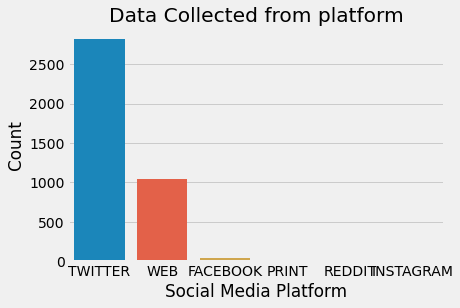

In [16]:
plt.title("Data Collected from platform")
plt.xlabel("Social Media Platform")
plt.ylabel("Count")
sns.barplot(x=list(data_platform.keys()),y=list(data_platform.values()),data=df)

In [17]:
df.drop('SocialNetwork',axis=1,inplace=True)

In [18]:
df

,SenderProfileImgUrl,Sender Followers Count,SenderGender,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,MessageType,CreatedTime,Language,...,Domain,Retweets,Tweet Generator,Location,Country,State,City,Latitude,Longitude,Message Type
0,https://pbs.twimg.com/profile_images/773954554...,2646.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",Twitter Retweet,2020-06-12 18:18:54.155,English,...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,https://pbs.twimg.com/profile_images/126785507...,507.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,Twitter Retweet,2020-06-12 18:15:08.667,English,...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",South Africa,Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,https://pbs.twimg.com/profile_images/913020134...,1718.0,NaN,NaN,NaN,NaN,This @McKinsey article provides us with some f...,Twitter Mention,2020-06-12 18:10:31.633,English,...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,NaN,0.0,NaN,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,Blog Post,2020-06-12 18:04:00.000,English,...,nanjingmarketinggroup.com,NaN,NaN,NaN,Canada,NaN,NaN,0.00000,0.00000,Blog Post
4,https://pbs.twimg.com/profile_images/231007149...,2218.0,M,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",Twitter Retweet,2020-06-12 17:58:36.473,English,...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,https://pbs.twimg.com/profile_images/773909130...,78387.0,M,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,Twitter Retweet,2020-06-07 18:34:23.499,English,...,twitter.com,NaN,Twitter for Android,France,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,https://pbs.twimg.com/profile_images/124908614...,1301.0,NaN,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,Twitter Update,2020-06-07 18:34:14.371,English,...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Spain,Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,https://pbs.twimg.com/profile_images/327166249...,40302.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,Twitter Retweet,2020-06-07 18:32:36.554,English,...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,https://pbs.twimg.com/profile_images/752486315...,1346.0,NaN,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,Twitter Retweet,2020-06-07 18:31:53.600,English,...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Turkey,Istanbul,NaN,41.03508,28.98331,Twitter Retweet


In [19]:
data_platform=dict(df['Country'].value_counts()[:10])

In [20]:
data_platform

{'United States': 1116,
 'United Kingdom': 347,
 'India': 203,
 'Canada': 132,
 'Spain': 132,
 'France': 72,
 'South Africa': 65,
 'Australia': 65,
 'Germany': 55,
 'Italy': 51}

<AxesSubplot:title={'center':'Data Generated By Countries'}, xlabel='Country', ylabel='Message Count'>

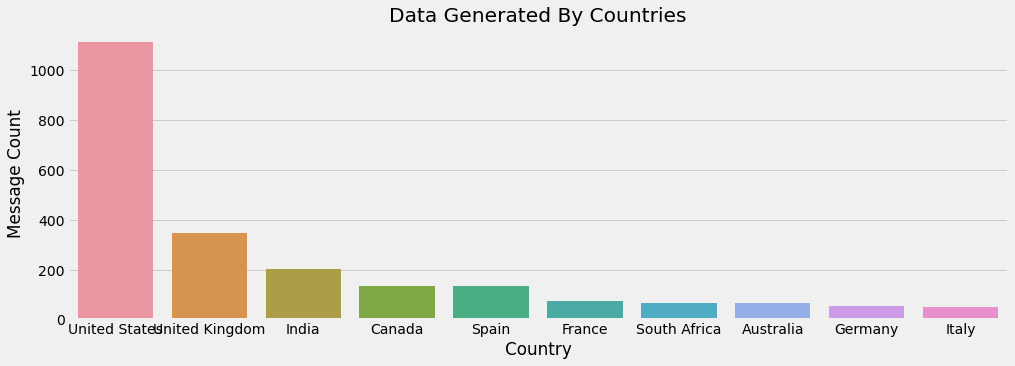

In [21]:
fig=plt.figure(figsize=(15,5))
plt.title("Data Generated By Countries")
plt.xlabel("Country")
plt.ylabel("Message Count")
sns.barplot(x=list(data_platform.keys()),y=list(data_platform.values()),data=df)

In [22]:
df.drop('Country',axis=1,inplace=True)

In [23]:
df

,SenderProfileImgUrl,Sender Followers Count,SenderGender,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,MessageType,CreatedTime,Language,...,Permalink,Domain,Retweets,Tweet Generator,Location,State,City,Latitude,Longitude,Message Type
0,https://pbs.twimg.com/profile_images/773954554...,2646.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",Twitter Retweet,2020-06-12 18:18:54.155,English,...,https://www.twitter.com/abagdadi/status/127150...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,https://pbs.twimg.com/profile_images/126785507...,507.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,Twitter Retweet,2020-06-12 18:15:08.667,English,...,https://www.twitter.com/techvignesh/status/127...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,https://pbs.twimg.com/profile_images/913020134...,1718.0,NaN,NaN,NaN,NaN,This @McKinsey article provides us with some f...,Twitter Mention,2020-06-12 18:10:31.633,English,...,https://www.twitter.com/ReworkAmerica/status/1...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,NaN,0.0,NaN,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,Blog Post,2020-06-12 18:04:00.000,English,...,https://www.nanjingmarketinggroup.com/blog/10-...,nanjingmarketinggroup.com,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,Blog Post
4,https://pbs.twimg.com/profile_images/231007149...,2218.0,M,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",Twitter Retweet,2020-06-12 17:58:36.473,English,...,https://www.twitter.com/Milanowekpet/status/12...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,https://pbs.twimg.com/profile_images/773909130...,78387.0,M,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,Twitter Retweet,2020-06-07 18:34:23.499,English,...,https://www.twitter.com/Nicochan33/status/1269...,twitter.com,NaN,Twitter for Android,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,https://pbs.twimg.com/profile_images/124908614...,1301.0,NaN,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,Twitter Update,2020-06-07 18:34:14.371,English,...,https://www.twitter.com/mserracanta/status/126...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,https://pbs.twimg.com/profile_images/327166249...,40302.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,Twitter Retweet,2020-06-07 18:32:36.554,English,...,https://www.twitter.com/IEAKwame/status/126969...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,https://pbs.twimg.com/profile_images/752486315...,1346.0,NaN,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,Twitter Retweet,2020-06-07 18:31:53.600,English,...,https://www.twitter.com/OmerAtakoglu/status/12...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Istanbul,NaN,41.03508,28.98331,Twitter Retweet


In [24]:
df['MessageType'].value_counts()

Twitter Retweet      1320
News                  828
Twitter Update        775
Twitter Mention       691
Blog Post             197
Facebook Post          45
Twitter Reply          32
Print News             20
Forums                 14
Instagram Post         14
Reddit Comment          9
Reddit Submission       6
Facebook Replies        1
Facebook Comment        1
Name: MessageType, dtype: int64

<AxesSubplot:title={'center':'Message Type and Counts'}, xlabel='Country', ylabel='Count'>

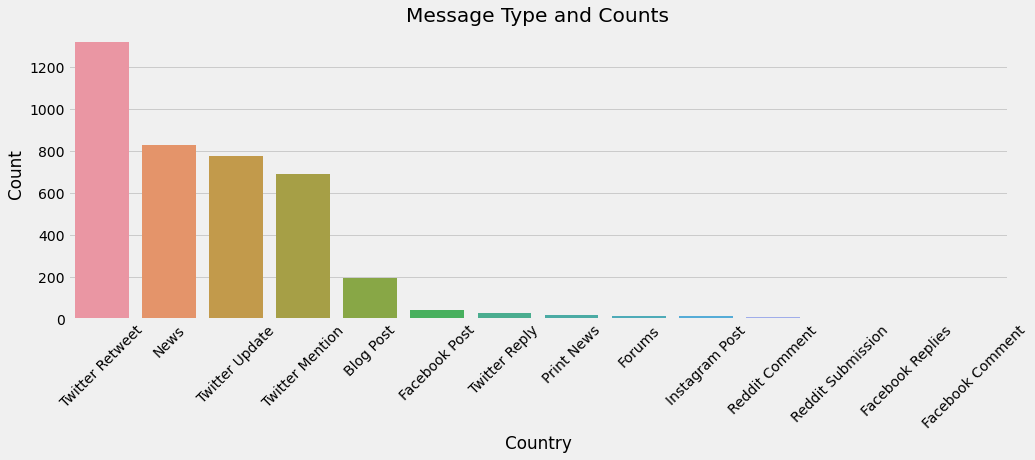

In [25]:
data_platform=dict(df['MessageType'].value_counts())
fig=plt.figure(figsize=(15,5))
plt.title("Message Type and Counts")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
sns.barplot(x=list(data_platform.keys()),y=list(data_platform.values()),data=df)

In [26]:
df.drop('MessageType',axis=1,inplace=True)

In [27]:
df

,SenderProfileImgUrl,Sender Followers Count,SenderGender,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,CreatedTime,Language,LanguageCode,...,Permalink,Domain,Retweets,Tweet Generator,Location,State,City,Latitude,Longitude,Message Type
0,https://pbs.twimg.com/profile_images/773954554...,2646.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",2020-06-12 18:18:54.155,English,en,...,https://www.twitter.com/abagdadi/status/127150...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,https://pbs.twimg.com/profile_images/126785507...,507.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,2020-06-12 18:15:08.667,English,en,...,https://www.twitter.com/techvignesh/status/127...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,https://pbs.twimg.com/profile_images/913020134...,1718.0,NaN,NaN,NaN,NaN,This @McKinsey article provides us with some f...,2020-06-12 18:10:31.633,English,en,...,https://www.twitter.com/ReworkAmerica/status/1...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,NaN,0.0,NaN,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,2020-06-12 18:04:00.000,English,en,...,https://www.nanjingmarketinggroup.com/blog/10-...,nanjingmarketinggroup.com,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,Blog Post
4,https://pbs.twimg.com/profile_images/231007149...,2218.0,M,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",2020-06-12 17:58:36.473,English,en,...,https://www.twitter.com/Milanowekpet/status/12...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,https://pbs.twimg.com/profile_images/773909130...,78387.0,M,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,2020-06-07 18:34:23.499,English,en,...,https://www.twitter.com/Nicochan33/status/1269...,twitter.com,NaN,Twitter for Android,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,https://pbs.twimg.com/profile_images/124908614...,1301.0,NaN,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,2020-06-07 18:34:14.371,English,en,...,https://www.twitter.com/mserracanta/status/126...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,https://pbs.twimg.com/profile_images/327166249...,40302.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,2020-06-07 18:32:36.554,English,en,...,https://www.twitter.com/IEAKwame/status/126969...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,https://pbs.twimg.com/profile_images/752486315...,1346.0,NaN,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,2020-06-07 18:31:53.600,English,en,...,https://www.twitter.com/OmerAtakoglu/status/12...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Istanbul,NaN,41.03508,28.98331,Twitter Retweet


In [28]:
df.drop("SenderProfileImgUrl",axis=1,inplace=True)

In [29]:
df

,Sender Followers Count,SenderGender,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,CreatedTime,Language,LanguageCode,CountryCode,...,Permalink,Domain,Retweets,Tweet Generator,Location,State,City,Latitude,Longitude,Message Type
0,2646.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",2020-06-12 18:18:54.155,English,en,NaN,...,https://www.twitter.com/abagdadi/status/127150...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,507.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,2020-06-12 18:15:08.667,English,en,ZA,...,https://www.twitter.com/techvignesh/status/127...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,1718.0,NaN,NaN,NaN,NaN,This @McKinsey article provides us with some f...,2020-06-12 18:10:31.633,English,en,NaN,...,https://www.twitter.com/ReworkAmerica/status/1...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,0.0,NaN,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,2020-06-12 18:04:00.000,English,en,CA,...,https://www.nanjingmarketinggroup.com/blog/10-...,nanjingmarketinggroup.com,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,Blog Post
4,2218.0,M,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",2020-06-12 17:58:36.473,English,en,NaN,...,https://www.twitter.com/Milanowekpet/status/12...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,78387.0,M,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,2020-06-07 18:34:23.499,English,en,FR,...,https://www.twitter.com/Nicochan33/status/1269...,twitter.com,NaN,Twitter for Android,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,1301.0,NaN,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,2020-06-07 18:34:14.371,English,en,ES,...,https://www.twitter.com/mserracanta/status/126...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,40302.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,2020-06-07 18:32:36.554,English,en,NaN,...,https://www.twitter.com/IEAKwame/status/126969...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,1346.0,NaN,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,2020-06-07 18:31:53.600,English,en,TR,...,https://www.twitter.com/OmerAtakoglu/status/12...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Istanbul,NaN,41.03508,28.98331,Twitter Retweet


In [30]:
df.drop("CountryCode",axis=1,inplace=True)

In [31]:
df

,Sender Followers Count,SenderGender,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,CreatedTime,Language,LanguageCode,MediaTypeList,Permalink,Domain,Retweets,Tweet Generator,Location,State,City,Latitude,Longitude,Message Type
0,2646.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",2020-06-12 18:18:54.155,English,en,PHOTO,https://www.twitter.com/abagdadi/status/127150...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,507.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,2020-06-12 18:15:08.667,English,en,VIDEO,https://www.twitter.com/techvignesh/status/127...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,1718.0,NaN,NaN,NaN,NaN,This @McKinsey article provides us with some f...,2020-06-12 18:10:31.633,English,en,LINK,https://www.twitter.com/ReworkAmerica/status/1...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,0.0,NaN,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,2020-06-12 18:04:00.000,English,en,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,nanjingmarketinggroup.com,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,Blog Post
4,2218.0,M,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",2020-06-12 17:58:36.473,English,en,PHOTO,https://www.twitter.com/Milanowekpet/status/12...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,78387.0,M,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,2020-06-07 18:34:23.499,English,en,NaN,https://www.twitter.com/Nicochan33/status/1269...,twitter.com,NaN,Twitter for Android,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,1301.0,NaN,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,2020-06-07 18:34:14.371,English,en,LINK,https://www.twitter.com/mserracanta/status/126...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,40302.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,2020-06-07 18:32:36.554,English,en,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,1346.0,NaN,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,2020-06-07 18:31:53.600,English,en,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Istanbul,NaN,41.03508,28.98331,Twitter Retweet


In [32]:
df['Language'].value_counts()

English    3953
Name: Language, dtype: int64

In [33]:
df.drop(['Language','LanguageCode'],axis=1,inplace=True)

In [34]:
df

,Sender Followers Count,SenderGender,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,CreatedTime,MediaTypeList,Permalink,Domain,Retweets,Tweet Generator,Location,State,City,Latitude,Longitude,Message Type
0,2646.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",2020-06-12 18:18:54.155,PHOTO,https://www.twitter.com/abagdadi/status/127150...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,507.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,2020-06-12 18:15:08.667,VIDEO,https://www.twitter.com/techvignesh/status/127...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,1718.0,NaN,NaN,NaN,NaN,This @McKinsey article provides us with some f...,2020-06-12 18:10:31.633,LINK,https://www.twitter.com/ReworkAmerica/status/1...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,0.0,NaN,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,2020-06-12 18:04:00.000,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,nanjingmarketinggroup.com,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,Blog Post
4,2218.0,M,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",2020-06-12 17:58:36.473,PHOTO,https://www.twitter.com/Milanowekpet/status/12...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,78387.0,M,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,2020-06-07 18:34:23.499,NaN,https://www.twitter.com/Nicochan33/status/1269...,twitter.com,NaN,Twitter for Android,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,1301.0,NaN,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,2020-06-07 18:34:14.371,LINK,https://www.twitter.com/mserracanta/status/126...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,40302.0,NaN,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,2020-06-07 18:32:36.554,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,1346.0,NaN,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,2020-06-07 18:31:53.600,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Istanbul,NaN,41.03508,28.98331,Twitter Retweet


In [35]:
df['Tweet Generator'].value_counts()[:20]

Twitter Web App        853
Twitter for iPhone     596
Twitter for Android    358
LinkedIn               157
IFTTT                  148
Buffer                 118
Hootsuite Inc.         106
Twitter for iPad        80
dlvr.it                 68
Sprinklr                68
TweetDeck               50
Sprout Social           31
HubSpot                 25
Paper.li                16
GaggleAMP               12
Dynamic Signal           8
Scoop.it                 7
ContentStudio.io         6
EveryoneSocial           6
Powered by Sprinklr      5
Name: Tweet Generator, dtype: int64

In [36]:
df.drop(['SenderGender','Sender Followers Count'],axis=1,inplace=True)

In [37]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,CreatedTime,MediaTypeList,Permalink,Domain,Retweets,Tweet Generator,Location,State,City,Latitude,Longitude,Message Type
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",2020-06-12 18:18:54.155,PHOTO,https://www.twitter.com/abagdadi/status/127150...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,2020-06-12 18:15:08.667,VIDEO,https://www.twitter.com/techvignesh/status/127...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,2020-06-12 18:10:31.633,LINK,https://www.twitter.com/ReworkAmerica/status/1...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,Twitter Mention
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,2020-06-12 18:04:00.000,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,nanjingmarketinggroup.com,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,Blog Post
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",2020-06-12 17:58:36.473,PHOTO,https://www.twitter.com/Milanowekpet/status/12...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,2020-06-07 18:34:23.499,NaN,https://www.twitter.com/Nicochan33/status/1269...,twitter.com,NaN,Twitter for Android,France,NaN,NaN,46.00000,2.00000,Twitter Retweet
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,2020-06-07 18:34:14.371,LINK,https://www.twitter.com/mserracanta/status/126...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Catalonia,NaN,41.82046,1.86768,Twitter Update
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,2020-06-07 18:32:36.554,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,Twitter Retweet
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,2020-06-07 18:31:53.600,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Istanbul,NaN,41.03508,28.98331,Twitter Retweet


In [38]:
df.columns

Index(['OriginalAuthor', 'OriginalAuthorProfileLink', 'Title', 'Message',
       'CreatedTime', 'MediaTypeList', 'Permalink', 'Domain', 'Retweets',
       'Tweet Generator', 'Location', 'State', 'City', 'Latitude', 'Longitude',
       'Message Type'],
      dtype='object')

In [39]:
data_platform=dict(df['OriginalAuthor'].value_counts()[:10])

<AxesSubplot:title={'center':'Top Original Authors'}, xlabel='Original Author', ylabel='Count'>

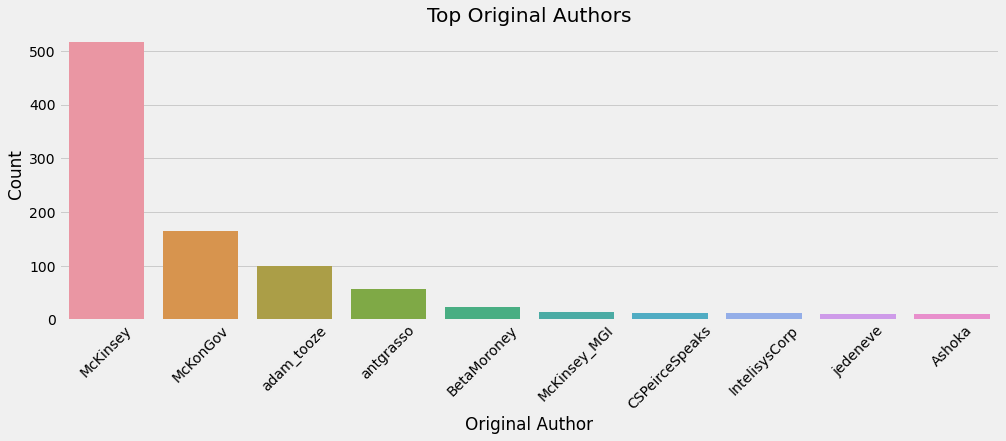

In [40]:
fig=plt.figure(figsize=(15,5))
plt.title("Top Original Authors")
plt.xlabel("Original Author")
plt.ylabel("Count")
plt.xticks(rotation=45)
sns.barplot(x=list(data_platform.keys()),y=list(data_platform.values()),data=df)

In [61]:
df['splitted_message']=df['Message'].apply(lambda message:str(message).split())

In [62]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,CreatedTime,MediaTypeList,Permalink,Domain,Retweets,Tweet Generator,Location,State,City,Latitude,Longitude,Message Type,splitted_message
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",2020-06-12 18:18:54.155,PHOTO,https://www.twitter.com/abagdadi/status/127150...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet,"[RT, @McKinsey, Beyond, the, #COVID19, crisis,..."
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,2020-06-12 18:15:08.667,VIDEO,https://www.twitter.com/techvignesh/status/127...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet,"[RT, @McKinsey, We’re, tracking, #COVID19’s, i..."
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,2020-06-12 18:10:31.633,LINK,https://www.twitter.com/ReworkAmerica/status/1...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,Twitter Mention,"[This, @McKinsey, article, provides, us, with,..."
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,2020-06-12 18:04:00.000,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,nanjingmarketinggroup.com,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,Blog Post,"[10, Chinese, Market, Trends, Since, COVID-19,..."
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",2020-06-12 17:58:36.473,PHOTO,https://www.twitter.com/Milanowekpet/status/12...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet,"[RT, @McKonGov, In, a, war,, leadership, up, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,2020-06-07 18:34:23.499,NaN,https://www.twitter.com/Nicochan33/status/1269...,twitter.com,NaN,Twitter for Android,France,NaN,NaN,46.00000,2.00000,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope..."
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,2020-06-07 18:34:14.371,LINK,https://www.twitter.com/mserracanta/status/126...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Catalonia,NaN,41.82046,1.86768,Twitter Update,"[To, read!!, mckinsey.com/business-funct…]"
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,2020-06-07 18:32:36.554,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope..."
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,2020-06-07 18:31:53.600,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Istanbul,NaN,41.03508,28.98331,Twitter Retweet,"[RT, @retailgeek, Starbucks, China:, Pre-Covid..."


In [119]:
df['Message'].values

array(['RT @McKinsey Beyond the #COVID19 crisis, preparing for the jobs of tomorrow will challenge every community across the EU. @McKinsey_MGI just launched a new report on the #FutureofWork in Europe. mck.co/2YsrNgK https://t.co/OKDO2UTubS',
       'RT @McKinsey We’re tracking #COVID19’s impact on jobs by income levels, race, age groups and gender. Find this and other interactive charts and resources in our COVID Response Center. mck.co/3f8MPYu https://t.co/ujz5SREMML',
       'This @McKinsey article provides us with some food for thought as we start to think about where to go next after the Coronavirus crisis and how we can create a path to the new normal.\n\nqoo.ly/36hqzi',
       ...,
       'RT @McKinsey When can your region reopen? This local response matrix balances virus spread vis-a-vis public-health system readiness. mck.co/3cuSDdd #chartoftheday #dataviz https://t.co/Q82J22NcwS',
       'RT @retailgeek Starbucks China: Pre-Covid 15% digital orders, Peak-Covid 80% digital or

In [99]:
tweet="RT @McKinsey Beyond the #COVID19 crisis"
tweet = re.sub(r'^RT[\s]+', '', tweet)
print(tweet)

@McKinsey Beyond the #COVID19 crisis


In [112]:
tweet1="#handsome #style #skirt #girl #awesome100"
tweet = re.findall(r'#[a-zA-Z]+',tweet1) 

In [113]:
tweet

['#handsome', '#style', '#skirt', '#girl', '#awesome']

In [67]:
def hashtag_finder(message):
    tweet = re.findall(r'#[a-zA-Z]+',str(message))
    hashtags=""
    for i in tweet:
        hashtags+=i
        hashtags+=" "
    return hashtags

In [68]:
p.clean(df['Message'].iloc[0])

'Beyond the crisis, preparing for the jobs of tomorrow will challenge every community across the EU. just launched a new report on the in Europe.'

In [70]:
df['hashtag']=df['splitted_message'].apply(hashtag_finder)

In [71]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,CreatedTime,MediaTypeList,Permalink,Domain,Retweets,Tweet Generator,Location,State,City,Latitude,Longitude,Message Type,splitted_message,hashtag
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",2020-06-12 18:18:54.155,PHOTO,https://www.twitter.com/abagdadi/status/127150...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet,"[RT, @McKinsey, Beyond, the, #COVID19, crisis,...",#COVID #FutureofWork
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,2020-06-12 18:15:08.667,VIDEO,https://www.twitter.com/techvignesh/status/127...,twitter.com,NaN,Twitter for iPhone,"Johannesburg, Gauteng, South Africa",Gauteng,Johannesburg,-26.20227,28.04363,Twitter Retweet,"[RT, @McKinsey, We’re, tracking, #COVID19’s, i...",#COVID
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,2020-06-12 18:10:31.633,LINK,https://www.twitter.com/ReworkAmerica/status/1...,twitter.com,NaN,Traject Social,NaN,NaN,NaN,NaN,NaN,Twitter Mention,"[This, @McKinsey, article, provides, us, with,...",
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,2020-06-12 18:04:00.000,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,nanjingmarketinggroup.com,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,Blog Post,"[10, Chinese, Market, Trends, Since, COVID-19,...",
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",2020-06-12 17:58:36.473,PHOTO,https://www.twitter.com/Milanowekpet/status/12...,twitter.com,NaN,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,Twitter Retweet,"[RT, @McKonGov, In, a, war,, leadership, up, a...",#COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,2020-06-07 18:34:23.499,NaN,https://www.twitter.com/Nicochan33/status/1269...,twitter.com,NaN,Twitter for Android,France,NaN,NaN,46.00000,2.00000,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#ehealth #mhealth #GDP #AI #IoT #fintech #medt...
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,2020-06-07 18:34:14.371,LINK,https://www.twitter.com/mserracanta/status/126...,twitter.com,1.0,Twitter for iPhone,"Catalonia, Spain",Catalonia,NaN,41.82046,1.86768,Twitter Update,"[To, read!!, mckinsey.com/business-funct…]",
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,2020-06-07 18:32:36.554,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,twitter.com,NaN,Twitter for Android,NaN,NaN,NaN,NaN,NaN,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#chartoftheday #dataviz
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,2020-06-07 18:31:53.600,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,twitter.com,NaN,Twitter for iPhone,"Istanbul, Turkey",Istanbul,NaN,41.03508,28.98331,Twitter Retweet,"[RT, @retailgeek, Starbucks, China:, Pre-Covid...",


In [72]:
df.drop(['Tweet Generator','Location','State','City','Latitude','Longitude'],axis=1,inplace=True)

In [73]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,CreatedTime,MediaTypeList,Permalink,Domain,Retweets,Message Type,splitted_message,hashtag
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",2020-06-12 18:18:54.155,PHOTO,https://www.twitter.com/abagdadi/status/127150...,twitter.com,NaN,Twitter Retweet,"[RT, @McKinsey, Beyond, the, #COVID19, crisis,...",#COVID #FutureofWork
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,2020-06-12 18:15:08.667,VIDEO,https://www.twitter.com/techvignesh/status/127...,twitter.com,NaN,Twitter Retweet,"[RT, @McKinsey, We’re, tracking, #COVID19’s, i...",#COVID
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,2020-06-12 18:10:31.633,LINK,https://www.twitter.com/ReworkAmerica/status/1...,twitter.com,NaN,Twitter Mention,"[This, @McKinsey, article, provides, us, with,...",
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,2020-06-12 18:04:00.000,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,nanjingmarketinggroup.com,NaN,Blog Post,"[10, Chinese, Market, Trends, Since, COVID-19,...",
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",2020-06-12 17:58:36.473,PHOTO,https://www.twitter.com/Milanowekpet/status/12...,twitter.com,NaN,Twitter Retweet,"[RT, @McKonGov, In, a, war,, leadership, up, a...",#COVID
...,...,...,...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,2020-06-07 18:34:23.499,NaN,https://www.twitter.com/Nicochan33/status/1269...,twitter.com,NaN,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#ehealth #mhealth #GDP #AI #IoT #fintech #medt...
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,2020-06-07 18:34:14.371,LINK,https://www.twitter.com/mserracanta/status/126...,twitter.com,1.0,Twitter Update,"[To, read!!, mckinsey.com/business-funct…]",
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,2020-06-07 18:32:36.554,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,twitter.com,NaN,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#chartoftheday #dataviz
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,2020-06-07 18:31:53.600,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,twitter.com,NaN,Twitter Retweet,"[RT, @retailgeek, Starbucks, China:, Pre-Covid...",


In [74]:
df.drop(['Retweets','CreatedTime','Domain'],axis=1,inplace=True)

In [75]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,MediaTypeList,Permalink,Message Type,splitted_message,hashtag
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",PHOTO,https://www.twitter.com/abagdadi/status/127150...,Twitter Retweet,"[RT, @McKinsey, Beyond, the, #COVID19, crisis,...",#COVID #FutureofWork
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,VIDEO,https://www.twitter.com/techvignesh/status/127...,Twitter Retweet,"[RT, @McKinsey, We’re, tracking, #COVID19’s, i...",#COVID
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,LINK,https://www.twitter.com/ReworkAmerica/status/1...,Twitter Mention,"[This, @McKinsey, article, provides, us, with,...",
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,Blog Post,"[10, Chinese, Market, Trends, Since, COVID-19,...",
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",PHOTO,https://www.twitter.com/Milanowekpet/status/12...,Twitter Retweet,"[RT, @McKonGov, In, a, war,, leadership, up, a...",#COVID
...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,NaN,https://www.twitter.com/Nicochan33/status/1269...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#ehealth #mhealth #GDP #AI #IoT #fintech #medt...
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,LINK,https://www.twitter.com/mserracanta/status/126...,Twitter Update,"[To, read!!, mckinsey.com/business-funct…]",
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#chartoftheday #dataviz
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,Twitter Retweet,"[RT, @retailgeek, Starbucks, China:, Pre-Covid...",


In [77]:
hashtags=""
for i in df['hashtag']:
    data=i.split("#")
    for j in data:
        if data!="":
            hashtags+=j
            hashtags+=" "

In [78]:
hashtags

' COVID  FutureofWork   COVID     COVID   MedTech  Heathcare  SupplyChain    mckinsey  China  coronavirus  closedborders  India   COVID   COVID     MedTech  Heathcare  SupplyChain   COVID    COVID   covid  industry    Covid  LTWConnects      COVID  FutureofWork       COVID       telehealth  healthcare     GDP  Wellbeing   africa  covid   Coronavirus     GDP  Wellbeing   GDP  Wellbeing   COVID   COVID   Covid  LTWConnects   Covid  LTWConnects   COVID   COVID     telehealth  healthcare      digitalhealth  virtualhealth  healthcare  medtech  innovation  COVID  remotecare    COVID  FutureofWork   MedTech  Heathcare  SupplyChain   orangemoney     Covid  LTWConnects   Covid  LTWConnects    Covid  LTWConnects   Covid  LTWConnects   Covid  LTWConnects        covid  newnormal    MedTech  Heathcare  SupplyChain   MedTech  Heathcare  SupplyChain    COVID     riskmanagement  leadership  postcovid     COVID   COVID    COVID   Covid  GeorgeFloyd  SystemicRacism  BlackLivesMatter      MedTech  Heathc

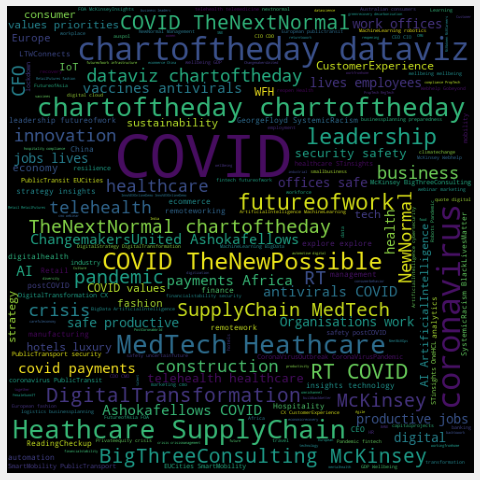

In [163]:
# Generate Word Cloud
fig=plt.figure(figsize=(12,8))
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width = 500, height = 500, colormap='viridis', random_state=10).generate(hashtags)
plt.imshow(wordcloud) 
plt.axis("off");
fig.savefig("wordcloudoftags.jpg")

### Sentiment Analysis

In [82]:
1 in [1,2,3]

True

In [91]:
!python -m spacy download en_core_web_md

  Created wheel for en-core-web-md: filename=en_core_web_md-2.3.1-py3-none-any.whl size=50916645 sha256=a9fb966ac0384ac748bb8879c83c54d3428aeacbfb82291f7742eb02ce423140
  Stored in directory: C:\Users\aviru\AppData\Local\Temp\pip-ephem-wheel-cache-iqp2pzkj\wheels\b8\ae\ae\c63bae74a3b3e18b2fa35e179387e6cdeb03a1c479ed45c351
Successfully built en-core-web-md
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [92]:
import en_core_web_md

In [93]:
model=en_core_web_md.load()

In [95]:
import string

In [94]:
model.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [113]:
def clean_message(lst):
    message=''
    for i in lst:
        if str(i) in model.Defaults.stop_words:
            continue
        elif str(i) in string.punctuation:
            continue
        elif str(i) in string.digits:
            continue
        else:
            message+=str(i)
            message+=" "
        
    return message

print(clean_message(df['splitted_message'].iloc[0]))
        

RT @McKinsey Beyond #COVID19 crisis, preparing jobs tomorrow challenge community EU. @McKinsey_MGI launched new report #FutureofWork Europe. mck.co/2YsrNgK https://t.co/OKDO2UTubS 


In [114]:
df['semi_clean']=df['splitted_message'].apply(clean_message)

In [116]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,MediaTypeList,Permalink,Message Type,splitted_message,hashtag,semi_clean
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",PHOTO,https://www.twitter.com/abagdadi/status/127150...,Twitter Retweet,"[RT, @McKinsey, Beyond, the, #COVID19, crisis,...",#COVID #FutureofWork,"RT @McKinsey Beyond #COVID19 crisis, preparing..."
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,VIDEO,https://www.twitter.com/techvignesh/status/127...,Twitter Retweet,"[RT, @McKinsey, We’re, tracking, #COVID19’s, i...",#COVID,RT @McKinsey We’re tracking #COVID19’s impact ...
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,LINK,https://www.twitter.com/ReworkAmerica/status/1...,Twitter Mention,"[This, @McKinsey, article, provides, us, with,...",,This @McKinsey article provides food thought s...
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,Blog Post,"[10, Chinese, Market, Trends, Since, COVID-19,...",,10 Chinese Market Trends Since COVID-19 Toggle...
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",PHOTO,https://www.twitter.com/Milanowekpet/status/12...,Twitter Retweet,"[RT, @McKonGov, In, a, war,, leadership, up, a...",#COVID,"RT @McKonGov In war, leadership ranks, adaptab..."
...,...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,NaN,https://www.twitter.com/Nicochan33/status/1269...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#ehealth #mhealth #GDP #AI #IoT #fintech #medt...,RT @McKinsey When region reopen? TY @McKinsey ...
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,LINK,https://www.twitter.com/mserracanta/status/126...,Twitter Update,"[To, read!!, mckinsey.com/business-funct…]",,To read!! mckinsey.com/business-funct…
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#chartoftheday #dataviz,RT @McKinsey When region reopen? This local re...
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,Twitter Retweet,"[RT, @retailgeek, Starbucks, China:, Pre-Covid...",,RT @retailgeek Starbucks China: Pre-Covid 15% ...


In [115]:
#df.drop("semi_clean",axis=1,inplace=True)

In [117]:
def clean_text(message):
    clean_message=p.clean(message)
    return clean_message

clean_text(df['semi_clean'].iloc[0])

'Beyond crisis, preparing jobs tomorrow challenge community EU. launched new report Europe.'

In [118]:
df['cleaned_message']=df['semi_clean'].apply(clean_text)

In [123]:
# Sentiment Analysis Fuction
def textblob_sentiment_calculator(message):
    cleaned_message=p.clean(message)
    blob=TextBlob(message)
    return blob.sentiment.polarity

In [120]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,MediaTypeList,Permalink,Message Type,splitted_message,hashtag,semi_clean,cleaned_message
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",PHOTO,https://www.twitter.com/abagdadi/status/127150...,Twitter Retweet,"[RT, @McKinsey, Beyond, the, #COVID19, crisis,...",#COVID #FutureofWork,"RT @McKinsey Beyond #COVID19 crisis, preparing...","Beyond crisis, preparing jobs tomorrow challen..."
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,VIDEO,https://www.twitter.com/techvignesh/status/127...,Twitter Retweet,"[RT, @McKinsey, We’re, tracking, #COVID19’s, i...",#COVID,RT @McKinsey We’re tracking #COVID19’s impact ...,"Were tracking impact jobs income levels, race,..."
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,LINK,https://www.twitter.com/ReworkAmerica/status/1...,Twitter Mention,"[This, @McKinsey, article, provides, us, with,...",,This @McKinsey article provides food thought s...,This article provides food thought start think...
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,Blog Post,"[10, Chinese, Market, Trends, Since, COVID-19,...",,10 Chinese Market Trends Since COVID-19 Toggle...,Chinese Market Trends Since COVID-19 Toggle na...
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",PHOTO,https://www.twitter.com/Milanowekpet/status/12...,Twitter Retweet,"[RT, @McKonGov, In, a, war,, leadership, up, a...",#COVID,"RT @McKonGov In war, leadership ranks, adaptab...","In war, leadership ranks, adaptability, clear ..."
...,...,...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,NaN,https://www.twitter.com/Nicochan33/status/1269...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#ehealth #mhealth #GDP #AI #IoT #fintech #medt...,RT @McKinsey When region reopen? TY @McKinsey ...,When region reopen? TY
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,LINK,https://www.twitter.com/mserracanta/status/126...,Twitter Update,"[To, read!!, mckinsey.com/business-funct…]",,To read!! mckinsey.com/business-funct…,To read!!
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#chartoftheday #dataviz,RT @McKinsey When region reopen? This local re...,When region reopen? This local response matrix...
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,Twitter Retweet,"[RT, @retailgeek, Starbucks, China:, Pre-Covid...",,RT @retailgeek Starbucks China: Pre-Covid 15% ...,"Starbucks China: Pre-Covid % digital orders, P..."


In [121]:
df['polarity_score']=df['cleaned_message'].apply(sentiment_calculator)

In [122]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,MediaTypeList,Permalink,Message Type,splitted_message,hashtag,semi_clean,cleaned_message,polarity_score
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",PHOTO,https://www.twitter.com/abagdadi/status/127150...,Twitter Retweet,"[RT, @McKinsey, Beyond, the, #COVID19, crisis,...",#COVID #FutureofWork,"RT @McKinsey Beyond #COVID19 crisis, preparing...","Beyond crisis, preparing jobs tomorrow challen...",0.136364
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,VIDEO,https://www.twitter.com/techvignesh/status/127...,Twitter Retweet,"[RT, @McKinsey, We’re, tracking, #COVID19’s, i...",#COVID,RT @McKinsey We’re tracking #COVID19’s impact ...,"Were tracking impact jobs income levels, race,...",-0.100000
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,LINK,https://www.twitter.com/ReworkAmerica/status/1...,Twitter Mention,"[This, @McKinsey, article, provides, us, with,...",,This @McKinsey article provides food thought s...,This article provides food thought start think...,0.143182
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,Blog Post,"[10, Chinese, Market, Trends, Since, COVID-19,...",,10 Chinese Market Trends Since COVID-19 Toggle...,Chinese Market Trends Since COVID-19 Toggle na...,0.066662
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",PHOTO,https://www.twitter.com/Milanowekpet/status/12...,Twitter Retweet,"[RT, @McKonGov, In, a, war,, leadership, up, a...",#COVID,"RT @McKonGov In war, leadership ranks, adaptab...","In war, leadership ranks, adaptability, clear ...",0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,NaN,https://www.twitter.com/Nicochan33/status/1269...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#ehealth #mhealth #GDP #AI #IoT #fintech #medt...,RT @McKinsey When region reopen? TY @McKinsey ...,When region reopen? TY,0.000000
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,LINK,https://www.twitter.com/mserracanta/status/126...,Twitter Update,"[To, read!!, mckinsey.com/business-funct…]",,To read!! mckinsey.com/business-funct…,To read!!,0.000000
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#chartoftheday #dataviz,RT @McKinsey When region reopen? This local re...,When region reopen? This local response matrix...,0.000000
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,Twitter Retweet,"[RT, @retailgeek, Starbucks, China:, Pre-Covid...",,RT @retailgeek Starbucks China: Pre-Covid 15% ...,"Starbucks China: Pre-Covid % digital orders, P...",0.000000


In [130]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [131]:
# Sentiment Analysis Fuction
def vader_sentiment_calculator(message):
    score1 = analyser.polarity_scores(message)
    return score1.get('compound')

vader_sentiment_calculator(df['cleaned_message'].iloc[0])

-0.5106

In [132]:
df["vader_sentiment_score"]=df['cleaned_message'].apply(vader_sentiment_calculator)

In [136]:
def sentiment_category(score):
    if score >= 0.05:
        return "Positive"
    elif score > -0.05 and score <0.05:
        return "Neutral"
    elif score <= -0.05 : 
        return "Negative"

In [137]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,MediaTypeList,Permalink,Message Type,splitted_message,hashtag,semi_clean,cleaned_message,polarity_score,vader_sentiment_score
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",PHOTO,https://www.twitter.com/abagdadi/status/127150...,Twitter Retweet,"[RT, @McKinsey, Beyond, the, #COVID19, crisis,...",#COVID #FutureofWork,"RT @McKinsey Beyond #COVID19 crisis, preparing...","Beyond crisis, preparing jobs tomorrow challen...",0.136364,-0.5106
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,VIDEO,https://www.twitter.com/techvignesh/status/127...,Twitter Retweet,"[RT, @McKinsey, We’re, tracking, #COVID19’s, i...",#COVID,RT @McKinsey We’re tracking #COVID19’s impact ...,"Were tracking impact jobs income levels, race,...",-0.100000,0.0000
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,LINK,https://www.twitter.com/ReworkAmerica/status/1...,Twitter Mention,"[This, @McKinsey, article, provides, us, with,...",,This @McKinsey article provides food thought s...,This article provides food thought start think...,0.143182,-0.4588
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,Blog Post,"[10, Chinese, Market, Trends, Since, COVID-19,...",,10 Chinese Market Trends Since COVID-19 Toggle...,Chinese Market Trends Since COVID-19 Toggle na...,0.066662,0.9985
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",PHOTO,https://www.twitter.com/Milanowekpet/status/12...,Twitter Retweet,"[RT, @McKonGov, In, a, war,, leadership, up, a...",#COVID,"RT @McKonGov In war, leadership ranks, adaptab...","In war, leadership ranks, adaptability, clear ...",0.125000,-0.8271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,NaN,https://www.twitter.com/Nicochan33/status/1269...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#ehealth #mhealth #GDP #AI #IoT #fintech #medt...,RT @McKinsey When region reopen? TY @McKinsey ...,When region reopen? TY,0.000000,0.5160
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,LINK,https://www.twitter.com/mserracanta/status/126...,Twitter Update,"[To, read!!, mckinsey.com/business-funct…]",,To read!! mckinsey.com/business-funct…,To read!!,0.000000,0.0000
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#chartoftheday #dataviz,RT @McKinsey When region reopen? This local re...,When region reopen? This local response matrix...,0.000000,0.2500
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,Twitter Retweet,"[RT, @retailgeek, Starbucks, China:, Pre-Covid...",,RT @retailgeek Starbucks China: Pre-Covid 15% ...,"Starbucks China: Pre-Covid % digital orders, P...",0.000000,0.0000


In [138]:
df['sentiment_category']=df['vader_sentiment_score'].apply(sentiment_category)

In [139]:
df

,OriginalAuthor,OriginalAuthorProfileLink,Title,Message,MediaTypeList,Permalink,Message Type,splitted_message,hashtag,semi_clean,cleaned_message,polarity_score,vader_sentiment_score,sentiment_category
0,McKinsey,https://twitter.com/McKinsey,NaN,"RT @McKinsey Beyond the #COVID19 crisis, prepa...",PHOTO,https://www.twitter.com/abagdadi/status/127150...,Twitter Retweet,"[RT, @McKinsey, Beyond, the, #COVID19, crisis,...",#COVID #FutureofWork,"RT @McKinsey Beyond #COVID19 crisis, preparing...","Beyond crisis, preparing jobs tomorrow challen...",0.136364,-0.5106,Negative
1,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey We’re tracking #COVID19’s impact ...,VIDEO,https://www.twitter.com/techvignesh/status/127...,Twitter Retweet,"[RT, @McKinsey, We’re, tracking, #COVID19’s, i...",#COVID,RT @McKinsey We’re tracking #COVID19’s impact ...,"Were tracking impact jobs income levels, race,...",-0.100000,0.0000,Neutral
2,NaN,NaN,NaN,This @McKinsey article provides us with some f...,LINK,https://www.twitter.com/ReworkAmerica/status/1...,Twitter Mention,"[This, @McKinsey, article, provides, us, with,...",,This @McKinsey article provides food thought s...,This article provides food thought start think...,0.143182,-0.4588,Negative
3,NaN,NaN,10 Chinese Market Trends Since COVID-19,10 Chinese Market Trends Since COVID-19 Toggle...,LINK,https://www.nanjingmarketinggroup.com/blog/10-...,Blog Post,"[10, Chinese, Market, Trends, Since, COVID-19,...",,10 Chinese Market Trends Since COVID-19 Toggle...,Chinese Market Trends Since COVID-19 Toggle na...,0.066662,0.9985,Positive
4,McKonGov,https://twitter.com/McKonGov,NaN,"RT @McKonGov In a war, leadership up and down ...",PHOTO,https://www.twitter.com/Milanowekpet/status/12...,Twitter Retweet,"[RT, @McKonGov, In, a, war,, leadership, up, a...",#COVID,"RT @McKonGov In war, leadership ranks, adaptab...","In war, leadership ranks, adaptability, clear ...",0.125000,-0.8271,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? TY @...,NaN,https://www.twitter.com/Nicochan33/status/1269...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#ehealth #mhealth #GDP #AI #IoT #fintech #medt...,RT @McKinsey When region reopen? TY @McKinsey ...,When region reopen? TY,0.000000,0.5160,Positive
3949,NaN,NaN,NaN,To read!! mckinsey.com/business-funct…,LINK,https://www.twitter.com/mserracanta/status/126...,Twitter Update,"[To, read!!, mckinsey.com/business-funct…]",,To read!! mckinsey.com/business-funct…,To read!!,0.000000,0.0000,Neutral
3950,McKinsey,https://twitter.com/McKinsey,NaN,RT @McKinsey When can your region reopen? This...,PHOTO,https://www.twitter.com/IEAKwame/status/126969...,Twitter Retweet,"[RT, @McKinsey, When, can, your, region, reope...",#chartoftheday #dataviz,RT @McKinsey When region reopen? This local re...,When region reopen? This local response matrix...,0.000000,0.2500,Positive
3951,retailgeek,https://twitter.com/retailgeek,NaN,RT @retailgeek Starbucks China: Pre-Covid 15% ...,LINK,https://www.twitter.com/OmerAtakoglu/status/12...,Twitter Retweet,"[RT, @retailgeek, Starbucks, China:, Pre-Covid...",,RT @retailgeek Starbucks China: Pre-Covid 15% ...,"Starbucks China: Pre-Covid % digital orders, P...",0.000000,0.0000,Neutral


In [161]:
data_platform=dict(df['sentiment_category'].value_counts())
for key in data_platform:
    data_platform[key]=data_platform[key]/len(df)
    print(data_platform[key])

0.5575512269162661
0.2251454591449532
0.21730331393878066


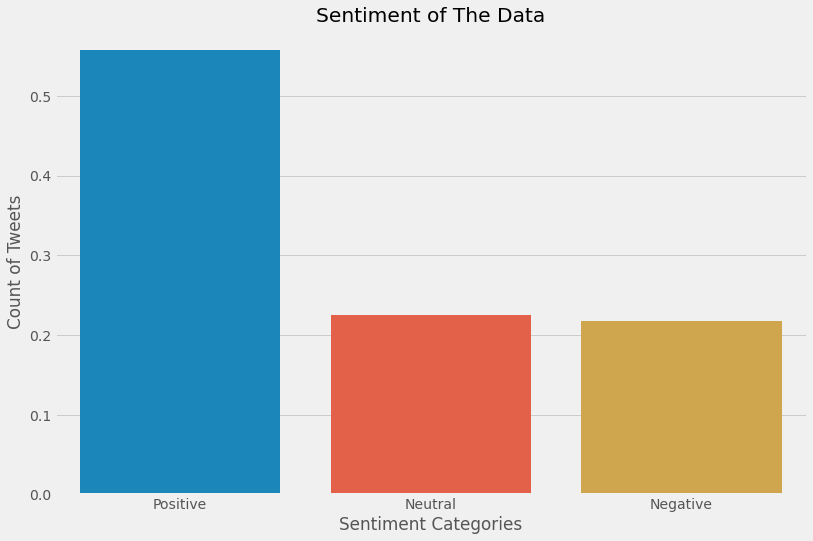

In [160]:
fig=plt.figure(figsize=(12,8))
plt.title("Sentiment of The Data")
plt.xlabel("Sentiment Categories")
plt.ylabel("Count of Tweets")
sns.barplot(x=list(data_platform.keys()),y=list(data_platform.values()),data=df)
fig.savefig("SentimentOfData.png")